In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving FSS.csv to FSS.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['FSS.csv']))
print(df)

           Date       Open       High        Low      Close  Adj Close
0      1/4/2010   6.110000   6.370000   6.020000   6.360000   5.445659
1      1/5/2010   6.390000   6.530000   6.360000   6.460000   5.531282
2      1/6/2010   6.440000   6.660000   6.410000   6.560000   5.616905
3      1/7/2010   6.560000   6.590000   6.330000   6.420000   5.497033
4      1/8/2010   6.380000   6.630000   6.380000   6.560000   5.616905
...         ...        ...        ...        ...        ...        ...
3390  6/23/2023  61.750000  62.310001  61.040001  61.990002  61.798252
3391  6/26/2023  61.990002  62.900002  61.799999  62.110001  61.917877
3392  6/27/2023  62.150002  63.209999  62.150002  63.020000  62.825062
3393  6/28/2023  63.110001  63.439999  62.990002  63.049999  62.854969
3394  6/29/2023  62.990002  64.110001  62.990002  63.900002  63.702343

[3395 rows x 6 columns]


In [6]:
data_training = df[df['Date'] < '2023-03-15'].copy()
data_testing = df[df['Date'] >= '2023-03-15'].copy()

In [7]:
data_training = data_training.drop(['Date'], axis = 1)

In [8]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.04950884, 0.05239752, 0.04945055, 0.05576136, 0.04561552],
       [0.05500982, 0.0554911 , 0.05612245, 0.05771105, 0.04728403],
       [0.05599214, 0.05800464, 0.05710361, 0.05966075, 0.04895253],
       ...,
       [0.94833004, 0.95746325, 0.94466248, 0.96860985, 0.96883735],
       [0.98212181, 0.97370454, 0.96251962, 0.96100604, 0.96128857],
       [0.96620821, 0.95842999, 0.96330457, 0.96061609, 0.96090137]])

In [9]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
x_train.shape

(1315, 60, 5)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [12]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [13]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
42/42 [==============================] - 14s 214ms/step - loss: 0.0279
Epoch 2/50
42/42 [==============================] - 7s 163ms/step - loss: 0.0063
Epoch 3/50
42/42 [==============================] - 9s 210ms/step - loss: 0.0040
Epoch 4/50
42/42 [==============================] - 7s 158ms/step - loss: 0.0033
Epoch 5/50
42/42 [==============================] - 9s 207ms/step - loss: 0.0037
Epoch 6/50
42/42 [==============================] - 7s 156ms/step - loss: 0.0035
Epoch 7/50
42/42 [==============================] - 9s 217ms/step - loss: 0.0031
Epoch 8/50
42/42 [==============================] - 7s 155ms/step - loss: 0.0032
Epoch 9/50
42/42 [==============================] - 9s 202ms/step - loss: 0.0034
Epoch 10/50
42/42 [==============================] - 8s 180ms/step - loss: 0.0029
Epoch 11/50
42/42 [==============================] - 10s 239ms/step - loss: 0.0027
Epoch 12/50
42/42 [==============================] - 9s 207ms/step - loss: 0.0028
Epoch 13/50
42/42 [====

In [15]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close
38,3/1/2010,7.70,8.30,7.70,8.23,7.046820
39,3/2/2010,8.29,8.40,8.20,8.39,7.183818
40,3/3/2010,8.42,8.55,8.05,8.46,7.243753
41,3/4/2010,8.45,8.56,8.32,8.54,7.312252
42,3/5/2010,8.58,8.77,8.47,8.60,7.363627


In [16]:
past_60_days = data_testing.tail(60)

In [17]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-17-5c4110cfb0fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close
0,54.630001,54.750000,52.349998,52.610001,52.349087
1,52.119999,52.419998,50.169998,50.900002,50.647572
2,50.900002,50.900002,50.180000,50.529999,50.279404
3,50.439999,51.419998,50.290001,51.180000,50.926182
4,51.380001,51.970001,51.130001,51.169998,50.916225


In [18]:
inputs = scaler.transform(df)
inputs

array([[1.00275047, 0.98781901, 0.95859496, 0.95749659, 0.95960473],
       [0.95343806, 0.9427687 , 0.91581631, 0.92415678, 0.92644795],
       [0.92946955, 0.91337976, 0.91601258, 0.91694284, 0.9192736 ],
       ...,
       [1.15049115, 1.15139207, 1.15090273, 1.16046011, 1.16374605],
       [1.16935164, 1.15583909, 1.16738625, 1.161045  , 1.16432884],
       [1.1669941 , 1.1687935 , 1.16738625, 1.17761749, 1.18084129]])

In [19]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((2020, 60, 5), (2020,))

In [20]:
x_test.shape

(2020, 60, 5)

In [21]:
y_pred = regressor.predict(x_test)

64/64 [==============================] - 4s 56ms/step


In [22]:
scaler.scale_

array([0.01964636, 0.01933488, 0.01962323, 0.01949698, 0.01948662])

In [24]:
scale = 1 / 0.01964636
scale

50.900014048403875

In [25]:
y_pred = y_pred * scale
y_test = y_test * scale

In [26]:
y_pred.shape

(2020, 1)

In [27]:
y_test.shape

(2020,)

In [28]:
y_pred[1950:]

array([[42.178577],
       [41.76869 ],
       [41.449017],
       [41.198174],
       [40.998425],
       [40.858604],
       [40.792988],
       [40.828003],
       [40.960136],
       [41.19509 ],
       [41.5163  ],
       [41.84984 ],
       [42.07808 ],
       [42.18251 ],
       [42.182987],
       [42.112926],
       [42.002388],
       [41.872837],
       [41.73874 ],
       [41.616226],
       [41.517315],
       [41.435204],
       [41.36372 ],
       [41.300373],
       [41.246693],
       [41.198452],
       [41.139236],
       [41.0729  ],
       [41.01595 ],
       [40.989704],
       [41.024414],
       [41.15221 ],
       [41.324245],
       [41.511234],
       [41.692577],
       [41.848278],
       [41.9645  ],
       [42.027218],
       [42.051193],
       [42.06021 ],
       [42.062412],
       [42.077126],
       [42.125034],
       [42.230034],
       [42.388954],
       [42.561565],
       [42.70044 ],
       [42.79388 ],
       [42.859398],
       [42.903835],


In [31]:
y_test[1950:]

array([49.0200126 , 48.65001352, 47.3200112 , 46.73001106, 48.24001342,
       48.29001243, 49.98001183, 49.92000982, 50.10001086, 50.53001096,
       51.04001308, 48.53001049, 47.3100132 , 46.85001009, 47.79001231,
       47.81001332, 48.1400114 , 47.7300113 , 47.79001231, 48.23001142,
       48.19001041, 46.92000911, 47.64001128, 47.34001121, 47.13001216,
       46.8900111 , 46.34001097, 47.21001017, 47.49001324, 48.47001247,
       50.35001092, 49.49001371, 48.84001156, 49.27001266, 48.88001257,
       49.53001072, 47.7200123 , 48.41001146, 48.89001157, 49.35001068,
       49.17000964, 49.49001371, 51.46001118, 50.92001005, 50.73001201,
       49.89001181, 49.04001261, 49.91001181, 50.63001298, 49.50001172,
       49.69001076, 51.89001228, 54.29001385, 53.2200136 , 54.68001294,
       56.50001337, 56.80001244, 56.51001138, 57.63001464, 58.55001286,
       57.93001371, 59.04001498, 58.12001276, 58.01001173, 59.28001303,
       58.16001377, 58.40001582, 58.56001586, 59.52001509, 59.40

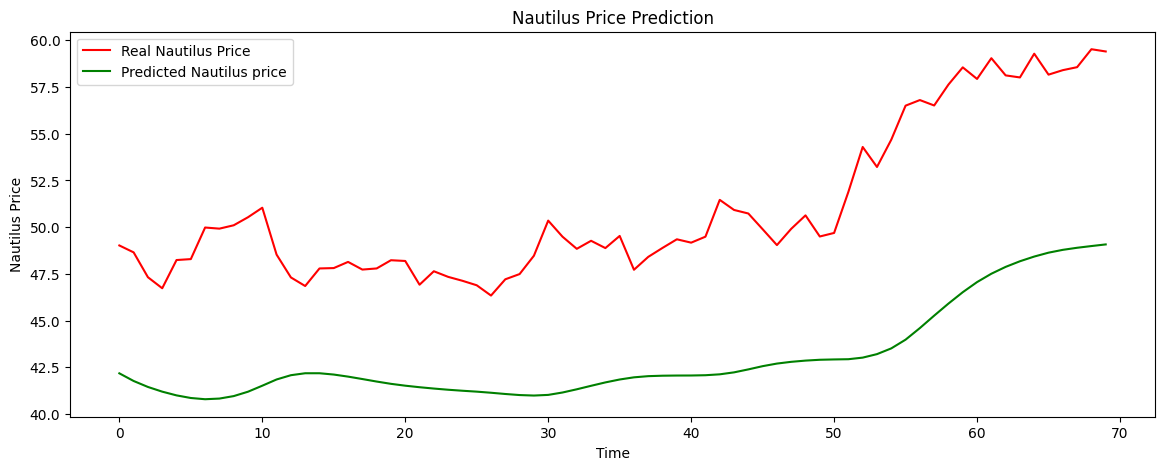

In [32]:
plt.figure(figsize = (14,5))
plt.plot(y_test[1950:], color = 'red', label = 'Real Nautilus Price')
plt.plot(y_pred[1950:], color = 'green', label = 'Predicted Nautilus price')
plt.title('Nautilus Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nautilus Price')
plt.legend()
plt.show()

In [33]:
for i in y_pred[2020:]:
  if y_pred[2020:] < 1.2 * y_test[2020:] & y_pred[2020:] > 0.75 * y_test[2020:]:
    print('1')
  else:
    print('0')
